In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('./training_data/TESTclean.csv')

In [4]:
spectra = np.array(data.iloc[:, 1:])
redshifts = np.array(data.iloc[:, 0])

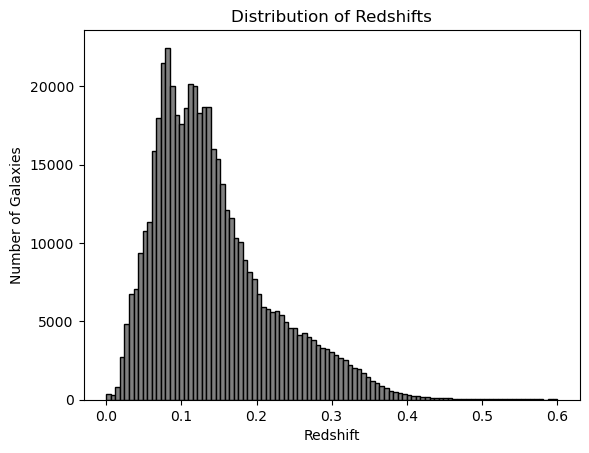

In [5]:
# Plot the distribution of the data
HIST_BIN_SCALE = 100
plt.hist(
  redshifts,
  bins=np.linspace(min(redshifts), max(redshifts), HIST_BIN_SCALE),
  edgecolor='black',
  alpha=1,
  color='grey'
)
plt.xlabel('Redshift')
plt.ylabel('Number of Galaxies')
plt.title('Distribution of Redshifts')

# Save the figure
plt.savefig('../figures/redshift_distribution.png')

plt.show()

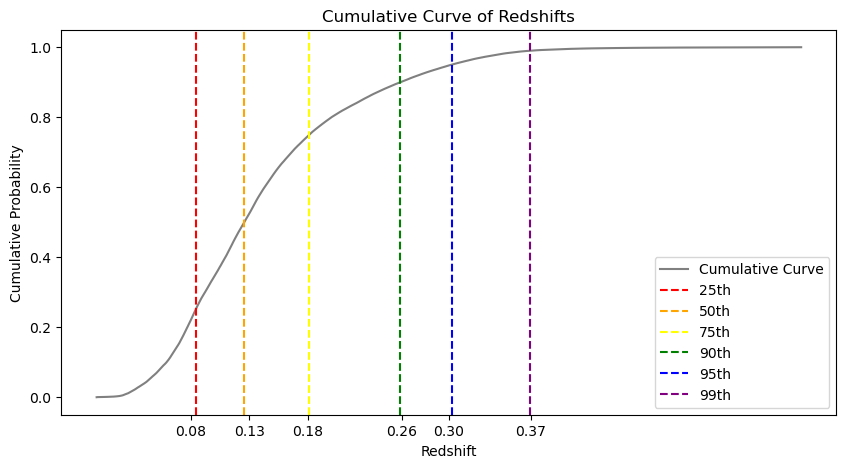

In [6]:
percentile_values = [25, 50, 75, 90, 95, 99]
percentiles = np.percentile(redshifts, percentile_values)

# make a wide figure
plt.figure(figsize=(10, 5))
redshifts_sorted = np.sort(redshifts)
cumulative_curve = np.arange(1, len(redshifts_sorted) + 1) / len(redshifts_sorted)
plt.plot(redshifts_sorted, cumulative_curve, color='grey', label='Cumulative Curve')

# Set labels and title
plt.xlabel('Redshift')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Curve of Redshifts')


# Add vertical lines for percentiles
line_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
i = 0
x_ticks = []
for percentile in percentiles:
    plt.axvline(percentile, color=line_colors[i], linestyle='--', label=f'{percentile_values[i]}th')
    x_ticks.append(percentile.round(2))
    i += 1

# Set labels and title
plt.xlabel('Redshift')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Curve of Redshifts')
plt.legend()

# Show the plot
plt.xticks(x_ticks)
plt.show()


In [7]:
# Find the percentiles of the data
print('Percentiles:')
print('  1st:  ', np.percentile(redshifts, 1))
print('  5th:  ', np.percentile(redshifts, 5))
print('  10th: ', np.percentile(redshifts, 10))
print('  25th: ', np.percentile(redshifts, 25))
print('  50th: ', np.percentile(redshifts, 50))
print('  75th: ', np.percentile(redshifts, 75))
print('  90th: ', np.percentile(redshifts, 90))
print('  95th: ', np.percentile(redshifts, 95))
print('  99th: ', np.percentile(redshifts, 99))

# Find the number of galaxies in each percentile
print('\nNumber of Galaxies in Each Percentile:')
print('  1st:  ', len(redshifts[redshifts < np.percentile(redshifts, 1)]))
print('  5th:  ', len(redshifts[redshifts < np.percentile(redshifts, 5)]))
print('  10th: ', len(redshifts[redshifts < np.percentile(redshifts, 10)]))
print('  25th: ', len(redshifts[redshifts < np.percentile(redshifts, 25)]))
print('  50th: ', len(redshifts[redshifts < np.percentile(redshifts, 50)]))
print('  75th: ', len(redshifts[redshifts < np.percentile(redshifts, 75)]))
print('  90th: ', len(redshifts[redshifts < np.percentile(redshifts, 90)]))
print('  95th: ', len(redshifts[redshifts < np.percentile(redshifts, 95)]))
print('  99th: ', len(redshifts[redshifts < np.percentile(redshifts, 99)]))

Percentiles:
  1st:   0.0256442385
  5th:   0.044627131
  10th:  0.059573064
  25th:  0.08431121750000001
  50th:  0.12573265
  75th:  0.181066275
  90th:  0.2585970000000001
  95th:  0.302280445
  99th:  0.36937634799999947

Number of Galaxies in Each Percentile:
  1st:   5204
  5th:   26020
  10th:  52040
  25th:  130098
  50th:  260196
  75th:  390294
  90th:  468352
  95th:  494372
  99th:  515188


In [8]:
# Find the average, mean and standard deviation of the data
print('Mean, median and Standard Deviation:')
print('  Mean:    ', np.mean(redshifts).round(3))
print('  Median:  ', np.median(redshifts).round(3))
print('  Std Dev: ', np.std(redshifts).round(3))

# Find the skewness and kurtosis of the data
print('Skewness and Kurtosis:')
print('  Skewness: ', pd.Series(redshifts).skew())
print('  Kurtosis: ', pd.Series(redshifts).kurt())


Mean, median and Standard Deviation:
  Mean:     0.142
  Median:   0.126
  Std Dev:  0.079
Skewness and Kurtosis:
  Skewness:  1.0936223827907259
  Kurtosis:  1.2702861656980189


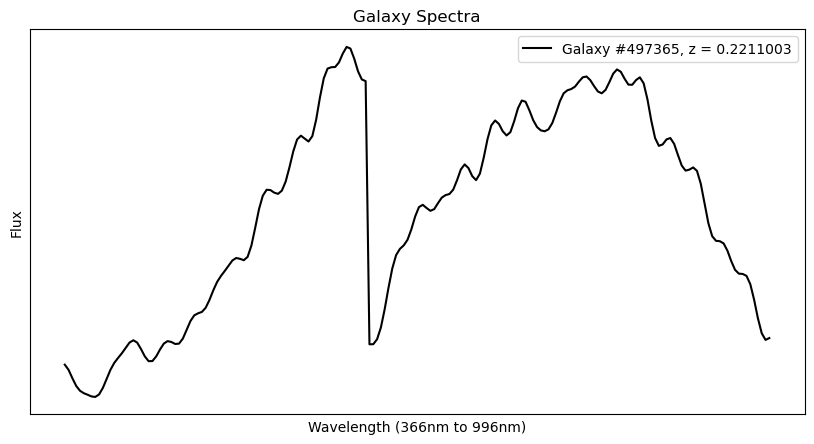

In [9]:
random_samples = data.sample(n=1)

grayscale_colors = ['0', '0.2', '0.4', '0.6', '0.8']

# Plot each spectrum
plt.figure(figsize=(10, 5))
i = 0
for index, row in random_samples.iterrows():
    plt.plot(row.index[1:], row.values[1:], label=f'Galaxy #{index}, z = {row.values[0]}', color=grayscale_colors[i])
    i += 1

plt.xticks([])
plt.yticks([])
plt.xlabel('Wavelength (366nm to 996nm)')
plt.ylabel('Flux')
plt.title('Galaxy Spectra')
plt.legend()

plt.savefig('../figures/galaxy_spectra.png')
plt.show()

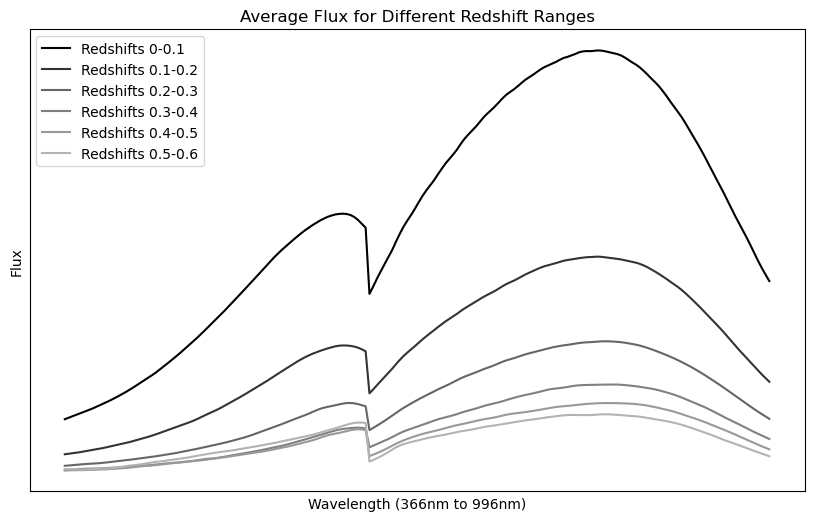

In [10]:
from sklearn.preprocessing import MinMaxScaler

redshift_ranges = [(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6)]
num_samples_per_range = 1000
average_flux_per_range = []

for start, end in redshift_ranges:
    filtered_indices = np.where((redshifts >= start) & (redshifts < end))[0]
    
    if len(filtered_indices) >= num_samples_per_range:
        selected_indices = np.random.choice(filtered_indices, num_samples_per_range, replace=False)
    else:
        selected_indices = filtered_indices
    
    average_flux = np.mean(spectra[selected_indices], axis=0)
    average_flux_per_range.append(average_flux)

average_flux_per_range = np.array(average_flux_per_range)

wavelengths = np.arange(186)
grayscale_colors = ['0', '0.2', '0.4', '0.5', '0.6', '0.7']

plt.figure(figsize=(10, 6))
for i, (start, end) in enumerate(redshift_ranges):
  plt.plot(
    wavelengths,
    average_flux_per_range[i],
    label=f'Redshifts {start}-{end}',
    color = grayscale_colors[i]
  )
plt.xlabel('Wavelength (366nm to 996nm)')
plt.ylabel('Flux')
plt.xticks([])
plt.yticks([])
plt.title('Average Flux for Different Redshift Ranges')
plt.legend()

plt.savefig('../figures/average_flux.png')
plt.show()


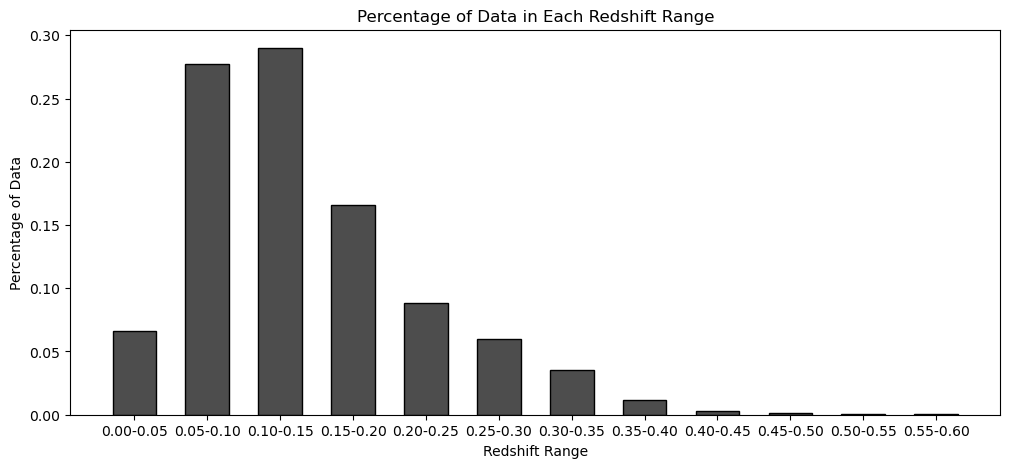

Percentage of Data in Each Redshift Range
| Redshift Range | Percentage |
|----------------|------------|
| 0.00-0.05 | 6.62 |
| 0.05-0.10 | 27.77 |
| 0.10-0.15 | 28.99 |
| 0.15-0.20 | 16.61 |
| 0.20-0.25 | 8.80 |
| 0.25-0.30 | 6.00 |
| 0.30-0.35 | 3.55 |
| 0.35-0.40 | 1.15 |
| 0.40-0.45 | 0.30 |
| 0.45-0.50 | 0.11 |
| 0.50-0.55 | 0.06 |
| 0.55-0.60 | 0.04 |


In [58]:
# Find what percentage of the data is in each redshift range, per bin of 0.05
redshift_ranges = np.arange(0, 0.6, 0.05)
percentages = []
for i in range(len(redshift_ranges)):
    start = redshift_ranges[i]
    if i == len(redshift_ranges) - 1: end = redshift_ranges[i] + 0.05
    else: end = redshift_ranges[i + 1]
    filtered_indices = np.where((redshifts >= start) & (redshifts < end))[0]
    percentages.append(len(filtered_indices) / len(redshifts))

# Print the percentages in all ranges in markdown table format, along
print('Percentage of Data in Each Redshift Range')
print('| Redshift Range | Percentage |')
print('|----------------|------------|')
for i in range(len(percentages)):
    start = redshift_ranges[i]
    if i == len(redshift_ranges) - 1: end = redshift_ranges[i] + 0.05
    else: end = redshift_ranges[i + 1]
    print(f'| {start:.2f}-{end:.2f} | {100 * percentages[i]:.2f} |')